In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
!pip install -r requirements.txt

In [ ]:
!python -m spacy download en_core_web_sm

In [1]:
import pathlib; import psutil; _tmp = psutil.Process().parent().cmdline()
print('CondaEnv:', pathlib.Path(_tmp[0]).parent.parent.stem, '|', [_tmp2 for _tmp2 in _tmp if '--port' in _tmp2], '|', _tmp)
!jupyter notebook list
!curl -sSLG localhost:8372/api/sessions --data-urlencode `jupyter notebook list | grep ':8372' | awk '/token/ {split($1,a,"?")} END {print a[2]}'`  | jq


CondaEnv: class_pymc | ['--port=8371'] | ['/storage/arkareem/libraries/conda/envs/class_pymc/bin/python', '/storage/arkareem/libraries/conda/envs/class_pymc/bin/jupyter-notebook', '--no-browser', '--host=0.0.0.0', '--port=8371']
Currently running servers:
http://localhost:8372/?token=c4942c1ebb1004539d2c114c7b72bb90a0647b90b9899c3c :: /storage/arkareem/projects/classes/Penn-Tree-Bank-Project
http://localhost:8371/?token=68fd8ffb03c2569e287c6ab4d76b9372e7e57af8821bf470 :: /storage/arkareem/projects
[
  {
    "id": "0359e3f5-955d-450b-9902-5ae7e8a37ae7",
    "path": "sbert-jvsc-e9a4c7ce-dbce-4a11-9a05-16c1287a4f91977cbd28-64f8-490e-9f9a-c0127e37a42e.ipynb",
    "name": "c8485be7-e70a-430f-83dd-b99635624375",
    "type": "notebook",
    "kernel": {
      "id": "0027b746-184c-4f2b-b11a-48d854342a5d",
      "name": "python3",
      "last_activity": "2023-05-17T19:37:19.651842Z",
      "execution_state": "busy",
      "connections": 1
    },
    "notebook": {
      "path": "sbert-jvsc-e9a4c7

In [2]:
import dataset


# torchtext

In [6]:
import torchtext
torchtext.datasets.PennTreebank()

(ShardingFilterIterDataPipe,
 ShardingFilterIterDataPipe,
 ShardingFilterIterDataPipe)

In [ ]:
import torch
from torchtext.datasets import PennTreebank
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

# Define a tokenizer
tokenizer = get_tokenizer('basic_english')

# Load the Penn Treebank dataset
train_dataset, valid_dataset, test_dataset = PennTreebank()

# Build the vocabulary from the training dataset
train_vocab = build_vocab_from_iterator(map(tokenizer, train_dataset), specials=["<unk>", "<pad>"])

# Define a function to numericalize the tokens
def numericalize_tokens(tokens):
    return [train_vocab.stoi[token] for token in tokens]

# Define a function to preprocess a sentence
def preprocess_sentence(sentence):
    return numericalize_tokens(tokenizer(sentence))

# Example usage:
sentence = "This is an example sentence."
numericalized = preprocess_sentence(sentence)
tensor = torch.tensor(numericalized)
print(tensor)


In [93]:
import torchtext
from torchtext.datasets import PennTreebank

# Load the PennTreebank dataset
train_data = PennTreebank(split='train')
valid_data = PennTreebank(split='valid')
test_data = PennTreebank(split='test')

# Print some examples
print(len(list(train_data)))
print(len(list(valid_data)))
print(len(list(test_data)))


42068
3370
3761


In [95]:
print('sum train', sum([len(sentence.split(' ')) for sentence in train_data]))
print('sum valid', sum([len(sentence.split(' ')) for sentence in valid_data]))
print('sum test', sum([len(sentence.split(' ')) for sentence in test_data]))
887521+70390+78669

sum train 887521
sum valid 70390
sum test 78669


1036580

In [ ]:
import spacy
from tqdm import tqdm

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Tag sentences with spaCy
for sentence in tqdm(list(train_data)):
  doc = nlp(sentence)
  words = [token.text for token in doc]
  tags = [token.pos_ for token in doc]
#   print(words, tags)


In [31]:
for i, n in enumerate(train_data):
    print(n)
    if i == 10: break

aer banknote berlitz calloway centrust cluett fromstein gitano guterman hydro-quebec ipo kia memotec mlx nahb punts rake regatta rubens sim snack-food ssangyong swapo wachter
pierre <unk> N years old will join the board as a nonexecutive director nov. N
mr. <unk> is chairman of <unk> n.v. the dutch publishing group
rudolph <unk> N years old and former chairman of consolidated gold fields plc was named a nonexecutive director of this british industrial conglomerate
a form of asbestos once used to make kent cigarette filters has caused a high percentage of cancer deaths among a group of workers exposed to it more than N years ago researchers reported
the asbestos fiber <unk> is unusually <unk> once it enters the <unk> with even brief exposures to it causing symptoms that show up decades later researchers said
<unk> inc. the unit of new york-based <unk> corp. that makes kent cigarettes stopped using <unk> in its <unk> cigarette filters in N
although preliminary findings were reported more

/storage/arkareem/libraries/conda/lib/python3.9/site-packages/torch/utils/data/datapipes/iter/combining.py:297: UserWarning: Some child DataPipes are not exhausted when __iter__ is called. We are resetting the buffer and each child DataPipe will read from the start again.
  warnings.warn("Some child DataPipes are not exhausted when __iter__ is called. We are resetting "


# ibm data

In [56]:
!mkdir .data
!wget -q -O .data/ptb.zip https://ibm.box.com/shared/static/z2yvmhbskc45xd2a9a4kkn6hg4g4kj5r.zip
!unzip -o .data/ptb.zip -d .data
!cp .data/ptb/reader.py .


In [66]:
import reader
import importlib
importlib.reload(reader)

<module 'reader' from '/storage/arkareem/projects/classes/Penn-Tree-Bank-Project/reader.py'>

In [ ]:
!wget -O .data/simple-examples.tgz http://www.fit.vutbr.cz/~imikolov/rnnlm/simple-examples.tgz
!mkdir .data/simple-examples
!tar xzf .data/simple-examples.tgz -C .data/simple-examples


In [96]:
data_dir = ".data/simple-examples/simple-examples/data/"
raw_data = reader.ptb_raw_data(data_dir)
train_data, valid_data, test_data, vocab, word_to_id = raw_data
print(len(train_data))
print(len(valid_data))
print(len(test_data))

929589
73760
82430


In [78]:
def id_to_word(id_list):
    line = []
    for w in id_list:
        for word, wid in word_to_id.items():
            if wid == w:
                line.append(word)
    return line            
                

print(id_to_word(train_data[0:100]))


['aer', 'banknote', 'berlitz', 'calloway', 'centrust', 'cluett', 'fromstein', 'gitano', 'guterman', 'hydro-quebec', 'ipo', 'kia', 'memotec', 'mlx', 'nahb', 'punts', 'rake', 'regatta', 'rubens', 'sim', 'snack-food', 'ssangyong', 'swapo', 'wachter', '<eos>', 'pierre', '<unk>', 'N', 'years', 'old', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'nov.', 'N', '<eos>', 'mr.', '<unk>', 'is', 'chairman', 'of', '<unk>', 'n.v.', 'the', 'dutch', 'publishing', 'group', '<eos>', 'rudolph', '<unk>', 'N', 'years', 'old', 'and', 'former', 'chairman', 'of', 'consolidated', 'gold', 'fields', 'plc', 'was', 'named', 'a', 'nonexecutive', 'director', 'of', 'this', 'british', 'industrial', 'conglomerate', '<eos>', 'a', 'form', 'of', 'asbestos', 'once', 'used', 'to', 'make', 'kent', 'cigarette', 'filters', 'has', 'caused', 'a', 'high', 'percentage', 'of', 'cancer', 'deaths', 'among', 'a', 'group', 'of']


In [114]:
itera = reader.ptb_iterator(train_data, 16, 3)
first_touple = itera.__next__()
x = first_touple[0]
y = first_touple[1]
x, y, x.shape

(array([[9970, 9971, 9972],
        [   5, 2437,   54],
        [   6,    1,  232],
        [  34,   97, 4647],
        [   0,  332, 7147],
        [  18,  937, 1238],
        [   2,  823,    1],
        [   8,    1, 1716],
        [   5,    6, 1969],
        [  19,  484, 1112],
        [5266,    7,  390],
        [  53,  101,   26],
        [ 554,   16,  850],
        [   5,   25,  192],
        [   1,    9,  161],
        [  29,  466, 2028]], dtype=int32),
 array([[9971, 9972, 9974],
        [2437,   54, 2155],
        [   1,  232,   70],
        [  97, 4647,   43],
        [ 332, 7147,  328],
        [ 937, 1238, 1340],
        [ 823,    1,  376],
        [   1, 1716,    6],
        [   6, 1969,    0],
        [ 484, 1112, 1666],
        [   7,  390,   15],
        [ 101,   26, 1378],
        [  16,  850,    3],
        [  25,  192,   18],
        [   9,  161,  293],
        [ 466, 2028,    7]], dtype=int32),
 (16, 3))

# sbert

In [162]:
import numpy as np
import torch

import sbert

In [4]:
import wandb
!wandb login  # copy the key from https://wandb.ai/authorize

wandb: Currently logged in as: arkareem. Use `wandb login --relogin` to force relogin


In [243]:
import dataset

data_treebank = dataset.get_treebank_3914()
data_biology = dataset.get_biology()


In [257]:
# mix
# data = {
#     'train_sentences': data_treebank['train_sentences'] + data_biology['train_sentences'],
#     'test_sentences': data_treebank['test_sentences'],
#     'train_tags': data_treebank['train_tags'] + data_biology['train_tags'],
#     'test_tags': data_treebank['test_tags'],
#     'all_pos': sorted(set(data_treebank['all_pos'] + data_biology['all_pos'])),
# }
# Load the PennTreebank dataset
data = data_treebank
# data = data_biology

# TRAIN on PennTreebank and TEST on Biology
# data = data_biology
# data['train_sentences'] = data_treebank['train_sentences']
# data['train_tags'] = data_treebank['train_tags']
# data['all_pos'] = sorted(set(data_treebank['all_pos'] + data_biology['all_pos']))


In [245]:
len(data['train_sentences'])

72588

In [234]:
skip_pos = set()
# skip_pos = set(('#', '-LRB-', '-RRB-', '-NONE-'))
sum(len([i for i in s if i[1] in skip_pos]) for s in data['test_tags'])


0

In [173]:
def get_pos_mapper(pos_from, pos_to):
    """need to map matrix with columns for pos_from to columns for pos_to"""
    print(len(pos_from), len(pos_to))
    mapper = []  # each element takes column mapper[i] and moves it to column i
    cols_to_delete = []
    for i, pos in enumerate(pos_to):
        # pos_mapper[pos] = pos_to[i]
        if pos in pos_from:
            mapper.append(pos_from.index(pos))
        else:
            mapper.append(-1)
            cols_to_delete.append(i)
    def _map(x):
        x = x[:, mapper]
        # x = torch.delete(x, cols_to_delete, axis=1)
        x[:, cols_to_delete] = 0
        return x
    return _map
# pos_mapper = get_pos_mapper(data_biology['all_pos'], data_treebank['all_pos'])
# pos_mapper(torch.randn(200, 51))

In [33]:
# import pandas as pd
# a = set(data_treebank['all_pos'])
# b = set(data_biology['all_pos'])
# c = []
# for i in a.union(b):
#     if i in a and i in b:
#         c.append((i, 'z_both'))
#     elif i in a:
#         c.append((i, 'treebank'))
#     elif i in b:
#         c.append((i, 'biology'))
# c = pd.DataFrame(c, columns=['pos', 'dataset'])
# c.sort_values(by=['dataset'])

In [235]:
device = 'cuda:2'

from transformers import AutoTokenizer, AutoModel

# sbert_tokenizer = AutoTokenizer.from_pretrained('QCRI/bert-base-multilingual-cased-pos-english')
# sbert_model = AutoModel.from_pretrained('QCRI/bert-base-multilingual-cased-pos-english')

sbert_tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/multi-qa-mpnet-base-dot-v1')
sbert_model = AutoModel.from_pretrained('sentence-transformers/multi-qa-mpnet-base-dot-v1')

sbert_model = sbert_model.to(device)


In [212]:
sum(len(i) for i in data['train_sentences']) + len(data['test_sentences'])


111937

In [236]:
if sbert_model.config._name_or_path == 'QCRI/bert-base-multilingual-cased-pos-english':
    # FIX for POS SBERT
    cnt = sum([1 if any(['`' in w for w in sent]) else 0 for sent in data['train_sentences']])
    print(f'Found {cnt} sentences with ` in train')
    cnt = sum([1 if any(['`' in w for w in sent]) else 0 for sent in data['test_sentences']])
    print(f'Found {cnt} sentences with ` in test')
    data['train_sentences'] = [[w.replace('`', '\'') for w in sent] for sent in data['train_sentences']]
    data['test_sentences'] = [[w.replace('`', '\'') for w in sent] for sent in data['test_sentences']]



In [ ]:
embeds, attn_masks = sbert.sbert_encode_batched(sbert_model, sbert_tokenizer, [' '.join(x) for x in data['train_sentences']], 64)
train_embeds_pooled = sbert.pool_tokens(data['train_sentences'], embeds, attn_masks, sbert_tokenizer)

embeds, attn_masks = sbert.sbert_encode_batched(sbert_model, sbert_tokenizer, [' '.join(x) for x in data['test_sentences']], 64)
test_embeds_pooled = sbert.pool_tokens(data['test_sentences'], embeds, attn_masks, sbert_tokenizer)


## explore data

In [3]:
# clear cuda cache
# torch.cuda.empty_cache()
# !nvidia-smi

In [239]:
print(data['all_pos'])


['"', '#', '$', "''", '(', ')', ',', '-LRB-', '-NONE-', '-RRB-', '.', ':', 'ADJ', 'ADV', 'AUX', 'AUXG', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'N', 'NN', 'NNP', 'NNPS', 'NNS', 'None', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'V', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'V_PASS', 'WDT', 'WP', 'WP$', 'WRB', '``']


In [248]:
# embeds, attn_masks = sbert.sbert_encode_batched(sbert_model, sbert_tokenizer, [' '.join(x) for x in data['train_sentences']], 64)

print(f'Storing embeds would take: {embeds.numel() * 4 / 1024 / 1024 / 1024:.2f} GB')
print(f'Wasted: {100*attn_masks.sum().item() / attn_masks.numel():.1f}%')
print(embeds.shape, attn_masks.shape)


# print('The following sentences are longer than the maximum of 128 tokens:')
# sent_id_overlen = torch.where(attn_masks[:, -1] == 1)[0]
# for i in sent_id_overlen:
#     print('\t', ' '.join(data['train_sentences'][i]))

Storing embeds would take: 26.58 GB
Wasted: 30.4%
torch.Size([72588, 128, 768]) torch.Size([72588, 128])
The following sentences are longer than the maximum of 128 tokens:


In [249]:
# data['train_sentences']
i = 0
e = embeds[i, attn_masks[i]==1]
e.shape[0], len(data['train_sentences'][i])

print('sent', data['train_sentences'][i])
print('untokenized', sbert_tokenizer.convert_ids_to_tokens(sbert_tokenizer.encode_plus(' '.join(data['train_sentences'][i]))['input_ids']))

print('??? what is this in the test set', data['test_sentences'][739])

sent ['However', ',', 'a', 'definitive', 'conclusion', 'about', 'the', 'molecular', 'determinants', 'of', 'the', 'attenuation', 'could', 'not', 'be', 'drawn', '.']
untokenized ['<s>', 'however', ',', 'a', 'definitive', 'conclusion', 'about', 'the', 'molecular', 'deter', '##mina', '##nts', 'of', 'the', 'at', '##ten', '##uation', 'could', 'not', 'be', 'drawn', '.', '</s>']
??? what is this in the test set ['Combination', 'with', 'tramadol', '(', 'Ultram', ')', 'is', 'associated', 'with', 'increased', 'risk', 'of', 'seizures', '.']


In [265]:
# data = data_biology

[('of', 78179), ('the', 74022), (',', 72629), ('.', 69869), ('and', 49330), ('in', 44006), ('to', 27750), ('a', 24941), ('(', 24924), (')', 24682), ('that', 18395), ('is', 16619), ('by', 16576), ('with', 16488), ('cells', 13646), ('for', 11513), ('was', 10720), ('The', 10408), ('-', 8941), ('expression', 8669), ('gene', 8042), ('as', 7639), ('or', 7233), ('cell', 7120), ('B', 7098), ('from', 6702), ('are', 6680), ('not', 6663), ('were', 6310), ('be', 6260), ('an', 6218), ('protein', 6201), ('transcription', 6159), ('on', 6021), ('activation', 5741), ('human', 5565), ('activity', 5197), ('which', 5169), ('T', 5105), ('In', 4986)]
[(',', 33631), ('of', 32960), ('the', 30819), ('.', 30558), ('and', 23277), ('in', 19958), ('to', 12260), ('(', 12040), (')', 11994), ('a', 10604), ('that', 7915), ('with', 7621), ('is', 6725), ('by', 6671), ('cells', 5574), ('was', 4992), ('for', 4983), ('The', 4382), ('-', 3776), ('were', 3452), ('as', 3443), ('expression', 3228), ('cell', 2974), ('are', 2932

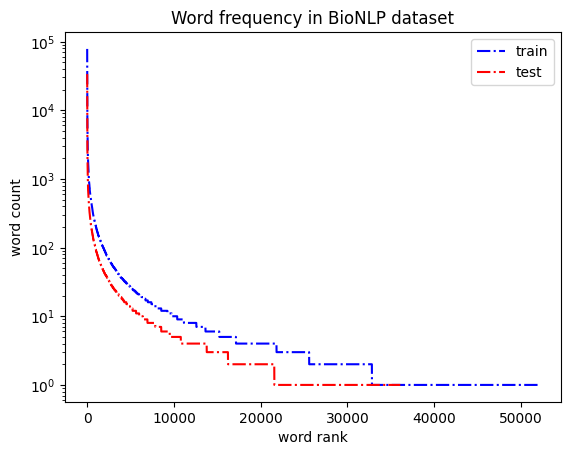

In [266]:
from matplotlib import pyplot as plt
from collections import Counter

all_words = [n for sent in data['train_sentences'] for n in sent]
counts = Counter(all_words)
max_counts_train = counts.most_common(40)
print(max_counts_train)
max_vals = sorted(list(counts.values()), reverse=True)
plt.plot(range(len(counts)), max_vals, label='train', linestyle='-.', color='blue')

all_words = [n for sent in data['test_sentences'] for n in sent]
counts = Counter(all_words)
max_counts_test = counts.most_common(40)
print(max_counts_test)
max_vals = sorted(list(counts.values()), reverse=True)
plt.plot(range(len(counts)), max_vals, label='test', linestyle='-.', color='red')

plt.yscale('log')
# plt.xscale('log')
plt.xlabel('word rank')
plt.ylabel('word count')
plt.title('Word frequency in BioNLP dataset')
plt.legend()
plt.savefig('bionlp1.png')


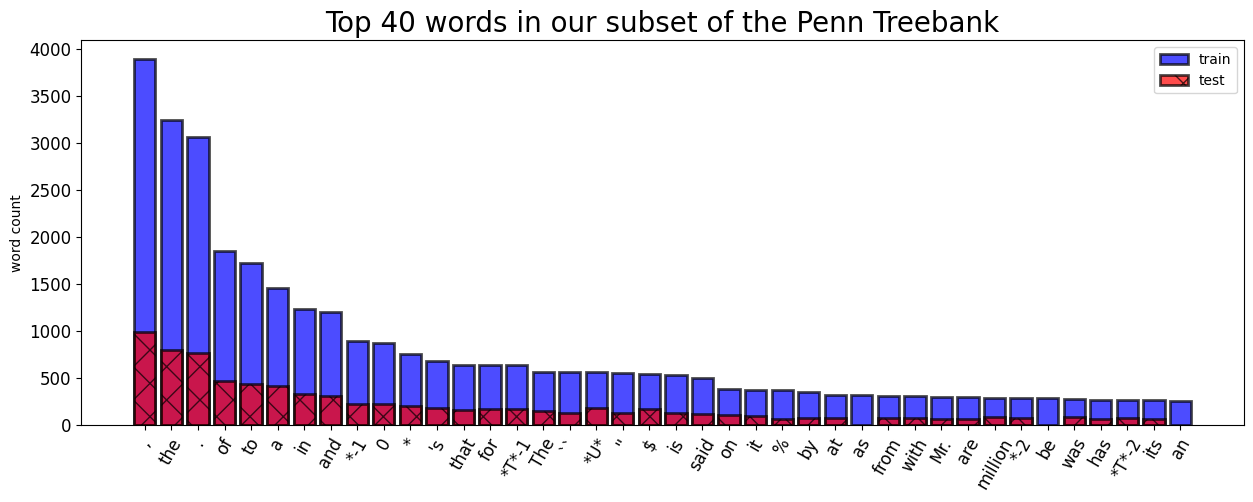

In [264]:
# make plot wider
plt.gcf().set_size_inches(15, 5)
# historgram of top 10 words
# change color to red
train_words = [n[0] for n in max_counts_train]
plt.bar(train_words, [n[1] for n in max_counts_train], label='train', alpha=0.7, hatch='', edgecolor='black', linewidth=2, color='blue')
plt.bar([n[0] for n in max_counts_test if n[0] in train_words], [n[1] for n in max_counts_test if n[0] in train_words], label='test', alpha=0.7, hatch='x', edgecolor='black', linewidth=2, color='red')

# increase font size for title
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=15)

plt.xticks(rotation=60)
plt.legend()

plt.ylabel('word count')
plt.title(f'Top {len(train_words)} words in our subset of the Penn Treebank', fontsize=20)

plt.savefig('penn2.png', bbox_inches='tight')


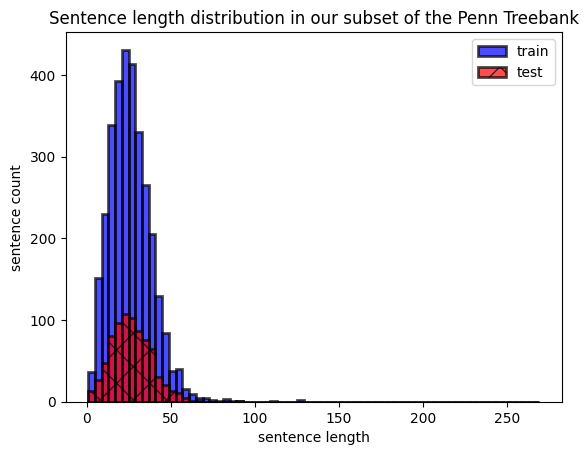

In [261]:
lens_train = [len(x) for x in data['train_sentences']]
lens_test = [len(x) for x in data['test_sentences']]
min_len = min(min(lens_train), min(lens_test))
max_len = max(max(lens_train), max(lens_test))

plt.hist(lens_train, bins=range(min_len, max_len+1, 4), label='train', alpha=0.7, hatch='', edgecolor='black', linewidth=2, color='blue')
plt.hist(lens_test, bins=range(min_len, max_len+1, 4), label='test', alpha=0.7, hatch='x', edgecolor='black', linewidth=2, color='red')
# plt.yscale('log')
plt.xlabel('sentence length')
plt.ylabel('sentence count')
plt.legend()
plt.title('Sentence length distribution in our subset of the Penn Treebank')
plt.savefig('penn3.png')

In [56]:
len([i for i in lens_train if i > 128])

1

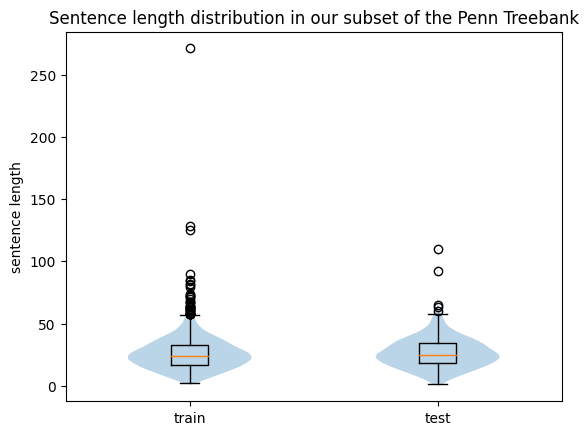

In [262]:
# boxplot
plt.boxplot([lens_train, lens_test], labels=['train', 'test'])
# violinplot
plt.violinplot([lens_train, lens_test], showextrema=False)
# color boxes
plt.ylabel('sentence length')
plt.title('Sentence length distribution in our subset of the Penn Treebank')
plt.savefig('penn4.png')

In [255]:
for i, n in enumerate(data['train_sentences']):
    if '*-1' in n and i != 2:
        print(i, n)
        print(data['train_tags'][i])
        break

3 ['The', 'new', 'company', 'will', 'attempt', '*-1', 'to', 'limit', 'the', 'shipyard', "'s", 'losses', ',', 'participants', 'said', '0', '*T*-2', '.']
[('The', 'DT'), ('new', 'JJ'), ('company', 'NN'), ('will', 'MD'), ('attempt', 'VB'), ('*-1', '-NONE-'), ('to', 'TO'), ('limit', 'VB'), ('the', 'DT'), ('shipyard', 'NN'), ("'s", 'POS'), ('losses', 'NNS'), (',', ','), ('participants', 'NNS'), ('said', 'VBD'), ('0', '-NONE-'), ('*T*-2', '-NONE-'), ('.', '.')]


## build simple model

In [215]:
import importlib
importlib.reload(sbert)

<module 'sbert' from '/storage/arkareem/projects/classes/Penn-Tree-Bank-Project/sbert.py'>

In [232]:

train_dataset = sbert.ListDataset(train_embeds_pooled, data['train_tags'], data['all_pos'], skip_pos=skip_pos)
test_dataset = sbert.ListDataset(test_embeds_pooled, data['test_tags'], data['all_pos'], skip_pos=skip_pos)

batch_size = 64
train_dataset = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: x)
test_dataset = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: x)


In [217]:
import importlib
importlib.reload(sbert)

<module 'sbert' from '/storage/arkareem/projects/classes/Penn-Tree-Bank-Project/sbert.py'>

In [199]:
# get most common pos
pos_counts = np.bincount([y for n in train_dataset.dataset.data for y in n[3]])
print('most common:', pos_counts.argmax(), data['all_pos'][pos_counts.argmax()])
print('predicting most common pos would be', f'{100*pos_counts[pos_counts.argmax()]/pos_counts.sum():.1f}%', 'accurate')

most common: 28 NN
predicting most common pos would be 13.0% accurate


In [230]:

device = 'cpu'

model_config = {
    'input_dim': 768, 
    'hidden_dims': [],
    'output_dim': len(data['all_pos']),
    'dropout': 0.2,
}

model = sbert.SimpleModel(model_config).to(device)


param_count = sum([p.numel() for n,p in model.named_parameters()])
print(f'trainable #p: {param_count:,}')

lr = 1e-3
weight_decay = 0.01
optim = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
criterion_ce = torch.nn.CrossEntropyLoss()
cur_epoch = 0

trainable #p: 43,833


In [ ]:
wandb.init(project="6.8630 Penn Treebank Project", config={
    "architecture": "SimpleModel",
    # "dataset": "treebank_3914",
    "dataset": "Biology",

    "learning_rate": lr,
    'weight_decay': weight_decay,
    "model_config": model_config,
    "#params": param_count,
})

In [74]:
wandb.finish()

In [ ]:
from tqdm.notebook import tqdm
importlib.reload(sbert)

device = 'cpu'
verbose = False
for i in range(300):
    train_acc = sbert.single_epoch(model, train_dataset, criterion_ce, epoch=cur_epoch, optim=optim, is_train=True, device=device, verbose=verbose)
    if i % 1 == 0:
        val_acc = sbert.single_epoch(model, test_dataset, criterion_ce, epoch=cur_epoch, optim=None, is_train=False, device=device, verbose=verbose)
        if not verbose: print(f'T {train_acc:.1f} V {val_acc:.1f}')
        if val_acc > float(sbert.read_json_prop('best_val')):
            sbert.write_json_prop('best_val', val_acc)
            torch.save({'params': model.state_dict(), 'config': model.model_config}, 'best_model.pt')
            print('---saved best model---')
    cur_epoch += 1

In [ ]:
sbert.single_epoch(model, test_dataset, criterion_ce, epoch=cur_epoch, optim=None, is_train=False, device=device)

In [204]:
print(data['all_pos'])

['"', '#', '$', "''", '(', ')', ',', '-LRB-', '-NONE-', '-RRB-', '.', ':', 'ADJ', 'ADV', 'AUX', 'AUXG', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'N', 'NN', 'NNP', 'NNPS', 'NNS', 'None', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'V', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'V_PASS', 'WDT', 'WP', 'WP$', 'WRB', '``']


In [83]:
# print('loading and testing')
checkpoint = torch.load('best_biology_model.pt')
model = sbert.SimpleModel(checkpoint['config']).to('cpu')
model.load_state_dict(checkpoint['params'])
sbert.single_epoch(model, test_dataset, criterion_ce=torch.nn.CrossEntropyLoss(), epoch=-1, optim=None, is_train=False, device='cpu', pos_mapper=pos_mapper)

Val Epoch: -1 Acc: 66.3% Loss: 2.461785: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 138.81it/s]


66.30006326341915

In [25]:
new_sentance = [
    'This is a test sentance'.split(' '),
    'This is a valid sentance'.split(' '),
    'The old man the boat'.split(' '),
    'Adam and Joe man the boat'.split(' '),
]

embeds, attn_masks = sbert.sbert_encode_batched(sbert_model, sbert_tokenizer, [' '.join(x) for x in new_sentance], 64, verbose=False)
new_embeds_pooled = sbert.pool_tokens(new_sentance, embeds, attn_masks, sbert_tokenizer, verbose=False)
with torch.no_grad():
    new_embeds_out = [loaded_model(x) for x in new_embeds_pooled]

for i in range(len(new_sentance)):
    o = new_embeds_out[i]
    prob_pos, pred_pos_id = torch.softmax(o, dim=1).max(dim=1)
    pred_pos = [data['all_pos'][x] for x in pred_pos_id]
    print('sent', new_sentance[i])
    print('pred', pred_pos)
    print('prob', [str(round(100*x.item()))+'%' for x in prob_pos])
    print('')


sent ['This', 'is', 'a', 'test', 'sentance']
pred ['FW', '``', 'FW', 'NNS', 'NNS']
prob ['95%', '99%', '99%', '99%', '79%']

sent ['This', 'is', 'a', 'valid', 'sentance']
pred ['FW', '``', 'FW', 'JJS', 'NNS']
prob ['94%', '100%', '100%', '100%', '99%']

sent ['The', 'old', 'man', 'the', 'boat']
pred ['FW', 'JJS', 'NNS', 'NNS', 'NNS']
prob ['100%', '100%', '98%', '90%', '98%']

sent ['Adam', 'and', 'Joe', 'man', 'the', 'boat']
pred ['PDT', 'DT', 'PDT', 'WRB', 'JJR', 'PDT']
prob ['99%', '100%', '100%', '89%', '60%', '85%']



In [26]:
len(data['train_sentences']), len(data['test_sentences'])

(3131, 783)

# Biology data

In [2]:
from tqdm.notebook import tqdm


In [4]:
import os
from pathlib import Path

d = Path('/storage/arkareem/projects/biology/git_repos/TEES/.tees/corpora/')
bio_files = [d/i for i in os.listdir(d)]
bio_files = [i for i in bio_files if i.is_file() and i.suffix == '.xml']
for i in bio_files:
    a, b, c = [1 if (word in i.stem) else 0 for word in ['train', 'devel', 'test']]
    assert a+b+c == 1
bio_files = {
    'train': [i for i in bio_files if 'train' in i.stem],
    'val': [i for i in bio_files if 'devel' in i.stem],
    'test': [i for i in bio_files if 'test' in i.stem],
}


In [ ]:
!head /storage/arkareem/projects/biology/git_repos/TEES/.tees/corpora/BB11-train.xml

In [25]:

import xml
import xml.etree.ElementTree as ET


def get_data(files):
    biology_data = []
    pbar = tqdm(files)
    for file_i, f in enumerate(pbar):
        root = ET.parse(f).getroot()
        docs = [i for i in root]
        # assert all(i.tag == 'document' for i in docs)
        for doc_i, doc in enumerate(docs):
            pbar.set_description(f'{100*doc_i/len(docs):.1f}')
            sents = [i for i in doc]
            # assert all(i.tag == 'sentence' for i in sents)
            for s_i, s in enumerate(sents):
                s = s.findall('analyses')
                if len(s) == 0: continue
                # assert len(s) == 1, (s, f.stem, doc_i, s_i)
                s = s[0].findall('tokenization')
                if len(s) == 0: continue
                # assert len(s) == 1, (s, f.stem, doc_i, s_i)
                s = s[0].findall('token')
                s = [(i.attrib['text'], i.attrib['POS']) for i in s]
                # print(s)
                biology_data.append({
                    'data': s,
                    'file': f.stem,
                    'doc_i': doc_i,
                    'sent_i': s_i,
                })
    return biology_data
biology_training_data = get_data(bio_files['train'])
biology_val_data = get_data(bio_files['val'])
biology_test_data = get_data(bio_files['test'])

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

In [61]:
import json
def my_json_dumps(x, fname):
    res = '[\n'
    for i in x:
        res += json.dumps(i, separators=(',', ':')) + ',\n'
    res = res[:-2] + '\n'
    res += ']'
    with open(fname, 'w') as f:
        f.write(res)

my_json_dumps(biology_training_data, '.data/biology/biology_data_train.json')
my_json_dumps(biology_val_data, '.data/biology/biology_data_val.json')
my_json_dumps(biology_test_data, '.data/biology/biology_data_test.json')

In [47]:
import numpy as np
print(f'Biology #samples:\n  Train:{len(biology_training_data):,} | Val:{len(biology_val_data):,}, Test:{len(biology_test_data):,}')
print(f'\nRandom example:')
s = np.random.choice(biology_training_data)
print('Sentance: ' + ' '.join([i[0] for i in s['data']]))
display(s)

Biology #samples:
  Train:72,596 | Val:19,624, Test:31,811

Random example:
Sentance: Renal cell carcinoma-derived gangliosides suppress nuclear factor-kappaB activation in T cells .


{'data': [('Renal', 'JJ'),
  ('cell', 'NN'),
  ('carcinoma-derived', 'JJ'),
  ('gangliosides', 'NNS'),
  ('suppress', 'VBP'),
  ('nuclear', 'JJ'),
  ('factor-kappaB', 'NN'),
  ('activation', 'NN'),
  ('in', 'IN'),
  ('T', 'NN'),
  ('cells', 'NNS'),
  ('.', '.')],
 'file': 'GE11-train',
 'doc_i': 231,
 'sent_i': 0}

In [76]:
biology_data

[['DNA', 'JJ'],
 ['-', 'JJ'],
 ['binding', 'JJ'],
 ['properties', 'NNS'],
 ['of', 'IN'],
 ['HIV-TF1', 'NNP'],
 ['suggested', 'VBD'],
 ['that', 'IN'],
 ['HIV-TF1', 'NNP'],
 ['might', 'MD'],
 ['be', 'AUX'],
 ['identical', 'JJ'],
 ['or', 'CC'],
 ['related', 'JJ'],
 ['to', 'TO'],
 ['USF', 'NNP'],
 ['.', '.']]

In [28]:
!ls -alh .data/biology

total 82M
drwxrwxr-x 2 arkareem arkareem 4.0K May 15 23:47 .
drwxrwxr-x 7 arkareem arkareem 4.0K May 15 23:37 ..
-rw-rw-r-- 1 arkareem arkareem  14M May 15 23:47 biology_data_test.json
-rw-rw-r-- 1 arkareem arkareem  31M May 15 23:43 biology_data_training.json
-rw-rw-r-- 1 arkareem arkareem  29M May 15 23:38 biology_data_training.pkl
-rw-rw-r-- 1 arkareem arkareem 8.3M May 15 23:46 biology_data_val.json


In [169]:
# root = ET.parse('/storage/arkareem/projects/biology/git_repos/TEES/.tees/corpora/DDI11-train.xml').getroot()
print_ele(root[0], children=True)

TAG:document {'id': 'BI11.d16', 'origId': 'PMID-10075739-S5', 'set': 'train', 'text': 'Here, we show that GerE binds near the sigK transcriptional start site, to act as a repressor.\n'} TEXT: 
children: 1
0   TAG:sentence {'charOffset': '0-95', 'id': 'BI11.d16.s0', 'origId': 'PMID-10075739-S5', 'text': 'Here, we show that GerE binds near the sigK transcriptional start site, to act as a repressor.\n'} TEXT: 
  children: 7
  0     TAG:entity {'charOffset': '19-23', 'given': 'True', 'headOffset': '19-23', 'id': 'BI11.d16.s0.e0', 'origId': 'PMID-10075739-S5.T1', 'text': 'GerE', 'type': 'Protein'} TEXT: 
  1     TAG:entity {'charOffset': '39-43', 'given': 'True', 'headOffset': '39-43', 'id': 'BI11.d16.s0.e1', 'origId': 'PMID-10075739-S5.T2', 'text': 'sigK', 'type': 'Gene'} TEXT: 
  2     TAG:entity {'charOffset': '44-70', 'given': 'True', 'headOffset': '66-70', 'id': 'BI11.d16.s0.e2', 'origId': 'PMID-10075739-S5.T3', 'text': 'transcriptional start site', 'type': 'Site'} TEXT: 
  3     TAG:i

In [ ]:
def print_ele(ele, children=False, indent=0):
    print(' '*indent + 'TAG:' + ele.tag, ele.attrib, 'TEXT:', ele.text.strip() if ele.text else '')
    if children and len(list(ele)) > 0:
        print(' '*indent + 'children:', len(list(ele)))
        for i, c in enumerate(ele):
            print(' '*indent + str(i), end=' ')
            print_ele(c, children=children, indent=indent+2)
# print_ele(sents[2], children=True)

# print_ele(s[0], children=True)
# sents[2][18][0].findall('token')


# End